# Subset Selection

In [3]:
import pandas as pd
bikes = pd.read_csv('..//data/bikes.csv')

In [5]:
bikes.head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Subscriber,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,41.88105,-87.61697,11.0,Michigan Ave & Oak St,41.90096,-87.623777,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Subscriber,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,41.88338,-87.64117,31.0,Wells St & Walton St,41.89993,-87.634430,19.0,69.1,10.0,6.9,-9999.0,partlycloudy


In [6]:
bikes.tail(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
50087,17535645,Subscriber,Female,2017-12-31 09:30:00,2017-12-31 09:33:00,178,Clinton St & Lake St,41.885637,-87.641823,23.0,Kingsbury St & Kinzie St,41.889177,-87.638506,31.0,7.0,10.0,11.5,-9999.0,partlycloudy
50088,17536246,Subscriber,Male,2017-12-31 15:22:00,2017-12-31 15:26:00,214,Clarendon Ave & Leland Ave,41.967968,-87.650001,15.0,Clifton Ave & Lawrence Ave,41.968812,-87.657659,15.0,10.9,10.0,15.0,-9999.0,partlycloudy


In [7]:
bikes.shape

(50089, 19)

In [8]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50089 entries, 0 to 50088
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_id            50089 non-null  int64  
 1   usertype           50089 non-null  object 
 2   gender             50089 non-null  object 
 3   starttime          50089 non-null  object 
 4   stoptime           50089 non-null  object 
 5   tripduration       50089 non-null  int64  
 6   from_station_name  50089 non-null  object 
 7   latitude_start     50083 non-null  float64
 8   longitude_start    50083 non-null  float64
 9   dpcapacity_start   50083 non-null  float64
 10  to_station_name    50089 non-null  object 
 11  latitude_end       50077 non-null  float64
 12  longitude_end      50077 non-null  float64
 13  dpcapacity_end     50077 non-null  float64
 14  temperature        50089 non-null  float64
 15  visibility         50089 non-null  float64
 16  wind_speed         500

In [10]:
bikes['gender'].value_counts()

Male      37654
Female    12435
Name: gender, dtype: int64

In [13]:
bikes['from_station_name'].value_counts()[:10]

Clinton St & Washington Blvd    879
Canal St & Adams St             751
Clinton St & Madison St         673
Canal St & Madison St           643
Columbus Dr & Randolph St       473
Clinton St & Lake St            431
Daley Center Plaza              426
LaSalle St & Jackson Blvd       424
Dearborn St & Monroe St         421
Kingsbury St & Kinzie St        395
Name: from_station_name, dtype: int64

In [16]:
bikes.groupby('from_station_name').count()['gender'][:10]

from_station_name
2112 W Peterson Ave                       8
63rd St Beach                             6
900 W Harrison                           24
900 W Harrison St                        63
Aberdeen St & Jackson Blvd              160
Aberdeen St & Madison St                 71
Aberdeen St & Monroe St                 113
Aberdeen St & Monroe St (Madison St)     31
Ada St & Washington Blvd                136
Adler Planetarium                        82
Name: gender, dtype: int64

In [17]:
bikes.columns

Index(['trip_id', 'usertype', 'gender', 'starttime', 'stoptime',
       'tripduration', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_name',
       'latitude_end', 'longitude_end', 'dpcapacity_end', 'temperature',
       'visibility', 'wind_speed', 'precipitation', 'events'],
      dtype='object')

In [26]:
bikes['starttime'] = pd.to_datetime(bikes['starttime'])


bikes['year'] = bikes['starttime'].dt.year
bikes['month'] = bikes['starttime'].dt.month
bikes['day'] = bikes['starttime'].dt.day

bikes['month_year'] = bikes['starttime'].dt.to_period('M')

In [27]:
bikes.head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,...,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events,year,month,day,month_year
0,7147,Subscriber,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,41.88105,-87.61697,11.0,...,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy,2013,6,28,2013-06
1,7524,Subscriber,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,41.88338,-87.64117,31.0,...,19.0,69.1,10.0,6.9,-9999.0,partlycloudy,2013,6,28,2013-06


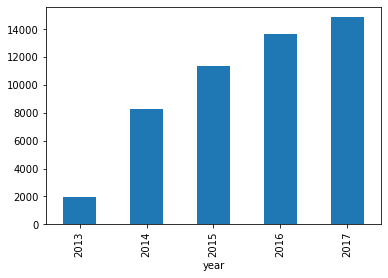

In [30]:
bikes.groupby('year').count()['trip_id'].plot(kind = 'bar')

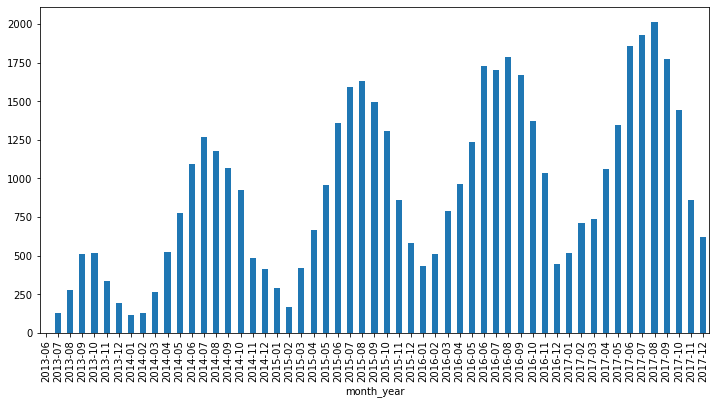

In [33]:
bikes.groupby('month_year').count()['trip_id'].plot(kind = 'bar', figsize = (12,6))

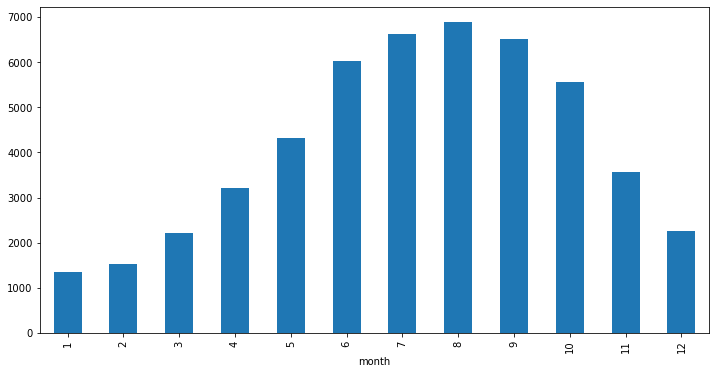

In [34]:
bikes.groupby('month').count()['trip_id'].plot(kind = 'bar', figsize = (12,6))

### The Query Method

#### Find a subset of data where tripduration > 1000

In [35]:
bikes.query('tripduration > 1000').head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,...,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events,year,month,day,month_year
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,...,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy,2013,6,30,2013-06
8,21028,Subscriber,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,...,15.0,71.1,8.0,0.0,-9999.0,cloudy,2013,7,3,2013-07


In [38]:
bikes[bikes['tripduration'] > 1000].head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,...,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events,year,month,day,month_year
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,...,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy,2013,6,30,2013-06
8,21028,Subscriber,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,...,15.0,71.1,8.0,0.0,-9999.0,cloudy,2013,7,3,2013-07


In [40]:
filt1 = bikes['tripduration'] > 1000
filt2 = bikes['tripduration'] < 2000

filt = bikes[filt1 & filt2]

In [42]:
filt.head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,...,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events,year,month,day,month_year
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,...,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy,2013,6,30,2013-06
8,21028,Subscriber,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,...,15.0,71.1,8.0,0.0,-9999.0,cloudy,2013,7,3,2013-07


In [47]:
bikes.query('2000 > tripduration > 1000').head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,...,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events,year,month,day,month_year
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,...,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy,2013,6,30,2013-06
8,21028,Subscriber,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,...,15.0,71.1,8.0,0.0,-9999.0,cloudy,2013,7,3,2013-07


#### Using Strings and, or , not

In [9]:
#find the subset of data in which tripduration is greater than 1000 and temperature ia above 90

bikes.query('tripduration > 1000 and temperature > 90').head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
74,78940,Subscriber,Male,2013-07-19 13:25:00,2013-07-19 13:47:00,1317,McClurg Ct & Illinois St,41.89102,-87.617300,23.0,Clinton St & Tilden St,41.875885,-87.640795,23.0,93.9,10.0,19.6,-9999.0,partlycloudy
352,338690,Subscriber,Male,2013-08-27 17:10:00,2013-08-27 17:36:00,1567,Dearborn St & Monroe St,41.88132,-87.629521,23.0,Sheffield Ave & Wellington Ave,41.936253,-87.653566,23.0,91.9,10.0,18.4,-9999.0,partlycloudy


In [14]:
#find the subset of data without data of  (tripduration is greater than 1000 or temperature ia above 90)

bikes.query('not (tripduration > 1000 or temperature > 90)').head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Subscriber,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,41.88105,-87.61697,11.0,Michigan Ave & Oak St,41.90096,-87.623777,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Subscriber,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,41.88338,-87.64117,31.0,Wells St & Walton St,41.89993,-87.634430,19.0,69.1,10.0,6.9,-9999.0,partlycloudy


### How to use @ symbol to reference a variable name ? 

In [16]:
td = 1000

bikes.query('tripduration > @td').head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,Dearborn St & Monroe St,41.88132,-87.629521,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy
8,21028,Subscriber,Male,2013-07-03 15:21:00,2013-07-03 15:42:00,1300,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,Wood St & Division St,41.90332,-87.672730,15.0,71.1,8.0,0.0,-9999.0,cloudy


### Reference strings with Quotation marks

In [18]:
#bikes.query('gender == "Female"')

bikes.query("gender == 'Female'")

# note that you have to use single qoute inside double quote or vice versa 

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
9,23558,Subscriber,Female,2013-07-04 15:00:00,2013-07-04 15:16:00,922,Lakeview Ave & Fullerton Pkwy,41.925858,-87.638973,19.0,Racine Ave & Congress Pkwy,41.874640,-87.657030,19.0,81.0,10.0,12.7,-9999.0,mostlycloudy
14,31121,Subscriber,Female,2013-07-06 12:39:00,2013-07-06 12:49:00,610,Morgan St & Lake St,41.885483,-87.652305,15.0,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15.0,82.0,10.0,5.8,-9999.0,mostlycloudy
20,42488,Subscriber,Female,2013-07-09 17:39:00,2013-07-09 17:55:00,943,State St & Van Buren St,41.877181,-87.627844,27.0,State St & 16th St,41.860121,-87.627729,15.0,82.9,10.0,9.2,-9999.0,mostlycloudy
21,42818,Subscriber,Female,2013-07-09 19:26:00,2013-07-09 19:38:00,726,Clark St & Randolph St,41.884576,-87.631890,31.0,State St & Harrison St,41.873958,-87.627739,19.0,82.9,10.0,9.2,-9999.0,partlycloudy
22,43804,Subscriber,Female,2013-07-10 09:18:00,2013-07-10 09:33:00,895,Wells St & Walton St,41.899930,-87.634430,19.0,Ashland Ave & Augusta Blvd,41.899643,-87.667700,15.0,82.0,10.0,11.5,-9999.0,partlycloudy
23,45077,Subscriber,Female,2013-07-10 12:34:00,2013-07-10 12:46:00,700,Lincoln Ave & Armitage Ave,41.918273,-87.638116,19.0,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19.0,84.9,10.0,16.1,-9999.0,mostlycloudy
24,46108,Subscriber,Female,2013-07-10 16:35:00,2013-07-10 16:44:00,511,Michigan Ave & Lake St,41.886058,-87.624289,23.0,Clinton St & Madison St,41.881582,-87.641277,23.0,82.9,10.0,12.7,-9999.0,partlycloudy
25,47798,Subscriber,Female,2013-07-11 08:17:00,2013-07-11 08:31:00,830,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Daley Center Plaza,41.884337,-87.630183,47.0,73.9,10.0,8.1,-9999.0,clear
36,54695,Subscriber,Female,2013-07-12 20:00:00,2013-07-12 20:16:00,953,Desplaines St & Kinzie St,41.888716,-87.644448,19.0,State St & Harrison St,41.873958,-87.627739,19.0,73.9,10.0,6.9,-9999.0,partlycloudy
40,61401,Subscriber,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,8.1,-9999.0,partlycloudy


### Use "in" in multiple equalities 

In [20]:
bikes.query('events in ["snow", "rain"]').head(2)

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
45,66336,Subscriber,Male,2013-07-15 16:43:00,2013-07-15 16:55:00,727,Greenwood Ave & 47th St,41.809835,-87.599383,15.0,State St & Harrison St,41.873958,-87.627739,19.0,82.9,10.0,5.8,0.0,rain
112,111568,Subscriber,Male,2013-07-26 19:10:00,2013-07-26 19:33:00,1395,Larrabee St & Kingsbury St,41.897764,-87.642884,27.0,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0,66.9,8.0,12.7,0.0,rain


###### Note : Query method does not work with the data having column name with spaces 

In [48]:
bikes['events'].value_counts()

partlycloudy    16998
mostlycloudy    15096
cloudy          12075
clear            2818
rain             1828
snow              466
hazy              348
tstorms           318
fog               122
sleet              16
unknown             4
Name: events, dtype: int64